# DATA SCIENCE FOR GOOD
## Data Preprocessing

Importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from shapely.geometry import Point
# import geopandas as gpd
import numpy as np
import os
from scipy import ndimage
from sklearn.preprocessing import LabelEncoder
import folium
from folium import plugins
import os 
from plotly.offline import init_notebook_mode, iplot

Importing and reading the relevant datasets with pandas library. The links are given in a way that corresponds to the project structure.

In [4]:
interview_ds = pd.read_csv('../Dept_24-00013/24-00013_UOF_2008-2017_prepped.csv')
employment_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_employment/ACS_15_5YR_S2301_with_ann.csv')
edu_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_education-attainment/ACS_15_5YR_S1501_with_ann.csv')
edu25_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_education-attainment-over-25/ACS_15_5YR_B15003_with_ann.csv')
ownerhousing_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_owner-occupied-housing/ACS_15_5YR_S2502_with_ann.csv')
poverty_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_poverty/ACS_15_5YR_S1701_with_ann.csv')
income_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_income/ACS_15_5YR_S1903_with_ann.csv')
race_ds = pd.read_csv('../Dept_24-00013/24-00013_ACS_data/24-00013_ACS_race-sex-age/ACS_15_5YR_DP05_with_ann.csv')
# map1 = gpd.read_file('../Dept_24-00013/24-00013_Shapefiles/Minneapolis_Police_Precincts.shp')

In [5]:
interview_ds.head(10)

,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
0,X,Y,PoliceUseOfForceID,ResponseDate,NaN,SubjectInjury,ForceTypeDetail,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,-1,BodilyForceType,Push Away,Black,Female,25,Assaulted Officer,2
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,-1,BodilyForceType,Body Weight to Pin,Black,Female,25,Assaulted Officer,2
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,-1,BodilyForceType,Punches,Black,Female,25,Assaulted Officer,2
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,0,BodilyForceType,Joint Lock,White,Male,27,Commission of Crime,3
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,0,BodilyForceType,Body Weight to Pin,White,Male,27,Commission of Crime,3
6,-93.24701977,44.95974418,6,2008-01-01,01:27:27.000Z,0,TaserDeployed,Firing Darts,White,Male,27,Commission of Crime,3
7,-93.27314066,44.98080828,7,2008-01-01,01:29:47.000Z,NaN,BodilyForceType,Push Away,White,Male,39,Commission of Crime,1
8,-93.27314066,44.98080828,8,2008-01-01,01:29:47.000Z,NaN,BodilyForceType,Body Weight to Pin,White,Male,39,Commission of Crime,1
9,-93.27310907,44.97918668,9,2008-01-01,01:40:02.000Z,NaN,BodilyForceType,Joint Lock,White,Male,42,Tensed,1



Creating a single dataset (new_df) from the existing ones (employment_ds, edu_ds, edu25_ds, ownerhousing_ds, poverty_ds, income_ds, race_ds).


In [6]:
new_df = pd.concat([employment_ds, edu_ds, edu25_ds, ownerhousing_ds, poverty_ds, income_ds, race_ds], axis=1, sort=False)
new_df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC03_VC108,HC04_VC108,HC01_VC109,HC02_VC109,HC03_VC109,HC04_VC109,HC01_VC110,HC02_VC110,HC03_VC110,HC04_VC110
0,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years an...,Labor Force Participation Rate; Estimate; Popu...,Labor Force Participation Rate; Margin of Erro...,Employment/Population Ratio; Estimate; Populat...,Employment/Population Ratio; Margin of Error; ...,Unemployment rate; Estimate; Population 16 yea...,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P..."
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,2082,(X),1058,126,50.8,4.9,1024,152,49.2,4.9
2,1400000US27053000102,27053000102,"Census Tract 1.02, Hennepin County, Minnesota",3856,262,65.4,6.9,60.5,6.8,7.5,...,3435,(X),1611,177,46.9,3.6,1824,192,53.1,3.6
3,1400000US27053000300,27053000300,"Census Tract 3, Hennepin County, Minnesota",2676,197,76.7,5.0,70.2,5.0,8.5,...,2538,(X),1187,111,46.8,3.2,1351,122,53.2,3.2
4,1400000US27053000601,27053000601,"Census Tract 6.01, Hennepin County, Minnesota",4114,346,77.9,4.7,74.2,4.9,4.8,...,3741,(X),1902,242,50.8,4.4,1839,185,49.2,4.4


In [7]:
new_df.shape # Looking at the shape of the dataset.

(300, 2103)

In [8]:
new_df.columns # Looking into the columns as the information given.

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01',
       'HC01_MOE_VC01', 'HC02_EST_VC01', 'HC02_MOE_VC01', 'HC03_EST_VC01',
       'HC03_MOE_VC01', 'HC04_EST_VC01',
       ...
       'HC03_VC108', 'HC04_VC108', 'HC01_VC109', 'HC02_VC109', 'HC03_VC109',
       'HC04_VC109', 'HC01_VC110', 'HC02_VC110', 'HC03_VC110', 'HC04_VC110'],
      dtype='object', length=2103)

Substituting the missing data with the NaN format.

In [9]:
new_df = new_df.where(new_df!='(X)', None)
new_df.head(2)

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC03_VC108,HC04_VC108,HC01_VC109,HC02_VC109,HC03_VC109,HC04_VC109,HC01_VC110,HC02_VC110,HC03_VC110,HC04_VC110
0,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years an...,Labor Force Participation Rate; Estimate; Popu...,Labor Force Participation Rate; Margin of Erro...,Employment/Population Ratio; Estimate; Populat...,Employment/Population Ratio; Margin of Error; ...,Unemployment rate; Estimate; Population 16 yea...,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P..."
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,2082,None,1058,126,50.8,4.9,1024,152,49.2,4.9


In [10]:
new_df.columns = new_df.iloc[0] # Replacing the existing headers with the relevant columns' names (those of the first row).
new_df.drop([0], axis=0, inplace=True) # dropping the first line of the dataset as it contains the headers
new_df.head()

,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years and over,Labor Force Participation Rate; Estimate; Population 16 years and over,Labor Force Participation Rate; Margin of Error; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Employment/Population Ratio; Margin of Error; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,2082,None,1058,126,50.8,4.9,1024,152,49.2,4.9
2,1400000US27053000102,27053000102,"Census Tract 1.02, Hennepin County, Minnesota",3856,262,65.4,6.9,60.5,6.8,7.5,...,3435,None,1611,177,46.9,3.6,1824,192,53.1,3.6
3,1400000US27053000300,27053000300,"Census Tract 3, Hennepin County, Minnesota",2676,197,76.7,5.0,70.2,5.0,8.5,...,2538,None,1187,111,46.8,3.2,1351,122,53.2,3.2
4,1400000US27053000601,27053000601,"Census Tract 6.01, Hennepin County, Minnesota",4114,346,77.9,4.7,74.2,4.9,4.8,...,3741,None,1902,242,50.8,4.4,1839,185,49.2,4.4
5,1400000US27053000603,27053000603,"Census Tract 6.03, Hennepin County, Minnesota",2227,119,77.6,4.7,76.0,4.9,2.1,...,2146,None,1015,83,47.3,3.0,1131,92,52.7,3.0


Checking the number of missing values in the dataset, considering that the maximum number is 300.

In [11]:
new_df.isnull().sum(axis=0)

0
Id                                                                                                                                                                                       0
Id2                                                                                                                                                                                      0
Geography                                                                                                                                                                                0
Total; Estimate; Population 16 years and over                                                                                                                                            0
Total; Margin of Error; Population 16 years and over                                                                                                                                     0
Labor Force Participation Rate; Estimate; Population 16 years a

In [12]:
new_df.isnull().sum(axis=0).max()

299

Dropping all the columns that have more than 200 missing values.

In [13]:
new_df1 = new_df.dropna(axis=1, thresh=200)
new_df1.head()

,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years and over,Labor Force Participation Rate; Estimate; Population 16 years and over,Labor Force Participation Rate; Margin of Error; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Employment/Population Ratio; Margin of Error; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,...,"Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",2481,253,72.1,4.6,66.2,6.0,8.2,...,191,2082,1058,126,50.8,4.9,1024,152,49.2,4.9
2,1400000US27053000102,27053000102,"Census Tract 1.02, Hennepin County, Minnesota",3856,262,65.4,6.9,60.5,6.8,7.5,...,276,3435,1611,177,46.9,3.6,1824,192,53.1,3.6
3,1400000US27053000300,27053000300,"Census Tract 3, Hennepin County, Minnesota",2676,197,76.7,5.0,70.2,5.0,8.5,...,166,2538,1187,111,46.8,3.2,1351,122,53.2,3.2
4,1400000US27053000601,27053000601,"Census Tract 6.01, Hennepin County, Minnesota",4114,346,77.9,4.7,74.2,4.9,4.8,...,272,3741,1902,242,50.8,4.4,1839,185,49.2,4.4
5,1400000US27053000603,27053000603,"Census Tract 6.03, Hennepin County, Minnesota",2227,119,77.6,4.7,76.0,4.9,2.1,...,117,2146,1015,83,47.3,3.0,1131,92,52.7,3.0


Deleting the duplicating columns.

In [14]:
new_df1 = new_df1.T.drop_duplicates().T

Filling the missing data with the 'ffill' method.

In [15]:
new_df1 = new_df1.fillna(method='ffill')

Looking into the datatypes of the dataset. 

In [16]:
 new_df1.dtypes

0
Id                                                                                                                                                                                     object
Id2                                                                                                                                                                                    object
Geography                                                                                                                                                                              object
Total; Estimate; Population 16 years and over                                                                                                                                          object
Total; Margin of Error; Population 16 years and over                                                                                                                                   object
Labor Force Participation Rate; Estimate; Popula

In [18]:
for i in new_df1.columns:
    if 'Margin' in i:
        new_df1 = new_df1.drop(i, axis=1)
new_df1.shape

#run two times

(299, 869)

In [19]:
for i in new_df1.columns[3:]:
    try:
        new_df1[i] = new_df1[i].astype(float)
    except Exception:
        pass
new_df1['Labor Force Participation Rate; Estimate; Population 16 years and over'].dtype

dtype('float64')

## Looking into the second dataset.
 

In [20]:
interview_ds.shape # Checking the shape of the dataset

(25802, 13)

In [21]:
interview_ds.columns # Checking the columns for the information available

Index(['LOCATION_LONGITUDE', 'LOCATION_LATITUDE', 'INCIDENT_UNIQUE_IDENTIFIER',
       'INCIDENT_DATE', 'INCIDENT_TIME', 'SUBJECT_INJURY',
       'TYPE_OF_FORCE_USED', 'WEAPON_OR_TOOL_USED', 'SUBJECT_RACE',
       'SUBJECT_GENDER', 'SUBJECT_AGE', 'REASON_FOR_FORCE',
       'LOCATION_DISTRICT'],
      dtype='object')

Checking the number of missing values per column considering that the total number of values is 25802. 

In [22]:
interview_ds.isnull().sum(axis=0) # Checking the null values per column

LOCATION_LONGITUDE               0
LOCATION_LATITUDE                0
INCIDENT_UNIQUE_IDENTIFIER       0
INCIDENT_DATE                    0
INCIDENT_TIME                    1
SUBJECT_INJURY                7659
TYPE_OF_FORCE_USED             957
WEAPON_OR_TOOL_USED              0
SUBJECT_RACE                   957
SUBJECT_GENDER                 957
SUBJECT_AGE                    958
REASON_FOR_FORCE               961
LOCATION_DISTRICT              957
dtype: int64

Dropping the columns containing more than 7000 of missing values (SUBJECT_INJURY).

In [23]:
inter = interview_ds.drop(['SUBJECT_INJURY'], axis=1)


Replacing the existing headers with the relevant ones (located in the first row of the dataset).

In [24]:
inter.columns = inter.iloc[0] # Replacing the existing headers with the relevant columns' names (those of the first row).
inter.drop([0], axis=0, inplace=True) # dropping the first line of the dataset as it contains the headers

inter.head(35)

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,BodilyForceType,Push Away,Black,Female,25,Assaulted Officer,2
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,BodilyForceType,Body Weight to Pin,Black,Female,25,Assaulted Officer,2
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,BodilyForceType,Punches,Black,Female,25,Assaulted Officer,2
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,BodilyForceType,Joint Lock,White,Male,27,Commission of Crime,3
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,BodilyForceType,Body Weight to Pin,White,Male,27,Commission of Crime,3
6,-93.24701977,44.95974418,6,2008-01-01,01:27:27.000Z,TaserDeployed,Firing Darts,White,Male,27,Commission of Crime,3
7,-93.27314066,44.98080828,7,2008-01-01,01:29:47.000Z,BodilyForceType,Push Away,White,Male,39,Commission of Crime,1
8,-93.27314066,44.98080828,8,2008-01-01,01:29:47.000Z,BodilyForceType,Body Weight to Pin,White,Male,39,Commission of Crime,1
9,-93.27310907,44.97918668,9,2008-01-01,01:40:02.000Z,BodilyForceType,Joint Lock,White,Male,42,Tensed,1
10,-93.27310907,44.97918668,10,2008-01-01,01:40:02.000Z,BodilyForceType,Body Weight to Pin,White,Male,42,Tensed,1


Filling the missing value using the 'ffill' method.

In [25]:
inter = inter.fillna(method='ffill')
l=inter

Text(0.5, 0, 'frequency')

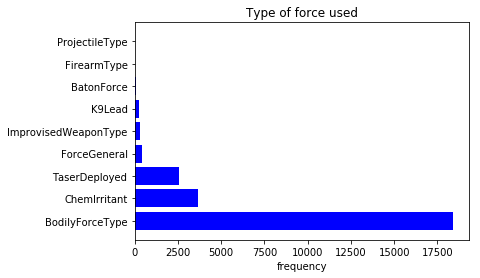

In [26]:
plt.barh(l['ForceTypeDetail'].value_counts().index, l['ForceTypeDetail'].value_counts(), align='center',
        color='blue', ecolor='black')
plt.title('Type of force used')
plt.xlabel('frequency')


In [27]:
inter.head(35)

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Sex,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,BodilyForceType,Push Away,Black,Female,25,Assaulted Officer,2
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,BodilyForceType,Body Weight to Pin,Black,Female,25,Assaulted Officer,2
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,BodilyForceType,Punches,Black,Female,25,Assaulted Officer,2
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,BodilyForceType,Joint Lock,White,Male,27,Commission of Crime,3
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,BodilyForceType,Body Weight to Pin,White,Male,27,Commission of Crime,3
6,-93.24701977,44.95974418,6,2008-01-01,01:27:27.000Z,TaserDeployed,Firing Darts,White,Male,27,Commission of Crime,3
7,-93.27314066,44.98080828,7,2008-01-01,01:29:47.000Z,BodilyForceType,Push Away,White,Male,39,Commission of Crime,1
8,-93.27314066,44.98080828,8,2008-01-01,01:29:47.000Z,BodilyForceType,Body Weight to Pin,White,Male,39,Commission of Crime,1
9,-93.27310907,44.97918668,9,2008-01-01,01:40:02.000Z,BodilyForceType,Joint Lock,White,Male,42,Tensed,1
10,-93.27310907,44.97918668,10,2008-01-01,01:40:02.000Z,BodilyForceType,Body Weight to Pin,White,Male,42,Tensed,1


Transforming the categorical data into the numerical one using LabelEncoder.

In [28]:
l_e = LabelEncoder()
inter.ForceTypeDetail = l_e.fit_transform(inter.ForceTypeDetail)
inter.Race = l_e.fit_transform(inter.Race)
inter.Sex = l_e.fit_transform(inter.Sex)
inter.ForceTypeAction = l_e.fit_transform(inter.ForceTypeAction)
inter.TypeOfResistance = l_e.fit_transform(inter.TypeOfResistance)

In [29]:
inter = inter.where(inter.X != '0')
inter.dropna(axis=0, subset = ['X'], inplace=True) # Dropping the missing values

In [30]:
inter.rename(columns={'Sex' : 'Male'}, inplace=True) 

# Changing the name of the column so that 1 = Male looks more obvious

data=inter
inter.head(65)

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25,0.0,2
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25,0.0,2
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25,0.0,2
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27,4.0,3
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27,4.0,3
6,-93.24701977,44.95974418,6,2008-01-01,01:27:27.000Z,8.0,13.0,6.0,1.0,27,4.0,3
7,-93.27314066,44.98080828,7,2008-01-01,01:29:47.000Z,1.0,29.0,6.0,1.0,39,4.0,1
8,-93.27314066,44.98080828,8,2008-01-01,01:29:47.000Z,1.0,4.0,6.0,1.0,39,4.0,1
9,-93.27310907,44.97918668,9,2008-01-01,01:40:02.000Z,1.0,17.0,6.0,1.0,42,8.0,1
10,-93.27310907,44.97918668,10,2008-01-01,01:40:02.000Z,1.0,4.0,6.0,1.0,42,8.0,1


In [31]:
inter.shape

(24718, 12)

Changing the type of data.

In [32]:
data.dtypes

0
X                      object
Y                      object
PoliceUseOfForceID     object
ResponseDate           object
NaN                    object
ForceTypeDetail       float64
ForceTypeAction       float64
Race                  float64
Male                  float64
EventAge               object
TypeOfResistance      float64
Precinct               object
dtype: object

In [33]:
for i in data.columns[5:]:
    data[i] = data[i].astype(float)
data.EventAge.dtype

dtype('float64')

Transforming the data into binary format by using dummies.

In [34]:
d = [5,6,7,10,11]
for i in d:
    n = pd.get_dummies(inter[inter.columns[i]])
    inter = pd.concat([inter, n], axis=1)
inter.head()
    

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,...,10.0,11.0,12.0,13.0,0.0,1.0,2.0,3.0,4.0,5.0
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25.0,...,0,0,0,0,0,0,1,0,0,0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25.0,...,0,0,0,0,0,0,1,0,0,0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25.0,...,0,0,0,0,0,0,1,0,0,0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27.0,...,0,0,0,0,0,0,0,1,0,0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27.0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
for i in inter.columns[5:]:
    inter[i] = inter[i].astype(float)
inter.EventAge.dtype

dtype('float64')

Checking the type of the data in the dataset.

In [36]:
inter.dtypes

X                      object
Y                      object
PoliceUseOfForceID     object
ResponseDate           object
NaN                    object
ForceTypeDetail       float64
ForceTypeAction       float64
Race                  float64
Male                  float64
EventAge              float64
TypeOfResistance      float64
Precinct              float64
0.0                   float64
1.0                   float64
2.0                   float64
3.0                   float64
4.0                   float64
5.0                   float64
6.0                   float64
7.0                   float64
8.0                   float64
1.0                   float64
2.0                   float64
3.0                   float64
4.0                   float64
5.0                   float64
6.0                   float64
7.0                   float64
8.0                   float64
9.0                   float64
                       ...   
35.0                  float64
36.0                  float64
0.0       

Changing the data type into the datetime format. 

In [37]:
inter.ResponseDate = pd.to_datetime(inter.ResponseDate, format='%Y-%m-%d')

In [38]:
k = inter.iloc[:,4]
k.rename('Time', inplace=True)
# inter = pd.concat(inter.drop(inter.columns[4], axis=1),k)
inter.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,...,10.0,11.0,12.0,13.0,0.0,1.0,2.0,3.0,4.0,5.0
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Dropping the missing values of the Male column.

In [39]:
inter.drop(labels= inter.loc[inter['Male']==2].index,axis=0, inplace=True)
inter.drop(labels = inter.loc[inter['Male']==3].index,axis=0, inplace=True)
inter.shape

(24447, 85)

Dividing the data into the training and the test sets.

In [40]:
ind_col_names = [x for x in inter if x!= 'Precinct'] #setting the parameters, choosing the target for interview ds
# ind_col_names1 = [x for x in new_df1 if x = ''] #setting the parameters, choosing the target for the major table
X = inter[ind_col_names]
y = inter.Precinct

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=17)

## Data Analysis 

In [41]:
data.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25.0,0.0,2.0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25.0,0.0,2.0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25.0,0.0,2.0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27.0,4.0,3.0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27.0,4.0,3.0


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
ForceTypeDetail,24718.0,1.983898,2.135454,0.0,1.0,1.0,2.0,8.0
ForceTypeAction,24718.0,16.830447,10.123113,1.0,4.0,17.0,28.0,36.0
Race,24718.0,2.451007,2.189917,0.0,1.0,1.0,6.0,7.0
Male,24718.0,0.892993,0.384174,0.0,1.0,1.0,1.0,3.0
EventAge,24718.0,28.068938,10.772558,0.0,21.0,26.0,34.0,77.0
TypeOfResistance,24718.0,6.125374,2.929416,0.0,4.0,6.0,8.0,13.0
Precinct,24718.0,2.722753,1.427412,0.0,1.0,3.0,4.0,5.0


Looking at data distribution (Unemployment rate and Education)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd150597198>]],
      dtype=object)

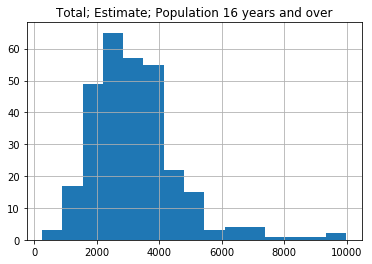

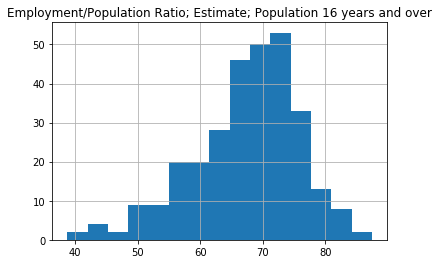

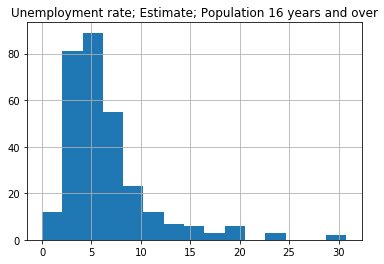

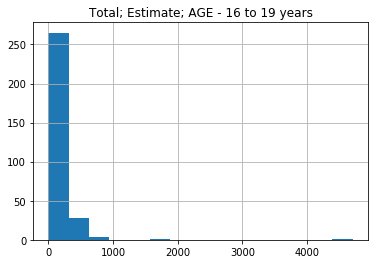

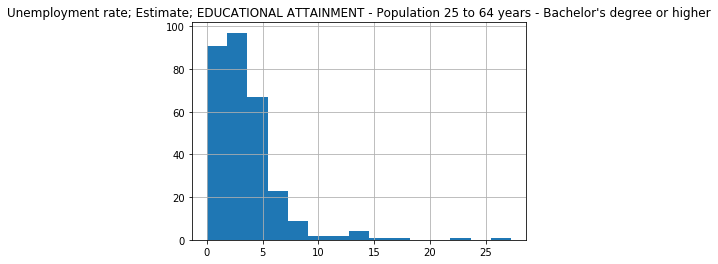

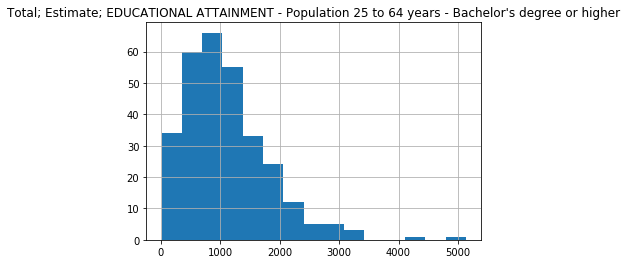

In [43]:
new_df1.hist('Total; Estimate; Population 16 years and over', bins=15)
new_df1.hist('Employment/Population Ratio; Estimate; Population 16 years and over', bins=15)
new_df1.hist('Unemployment rate; Estimate; Population 16 years and over', bins=15)
new_df1.hist('Total; Estimate; AGE - 16 to 19 years', bins=15)
new_df1.hist("Unemployment rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher", bins=15)
new_df1.hist("Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher", bins=15)


Checking the distribution of the types of Force used.

Checking the distribution of Age according to Races and Precincts

/usr/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



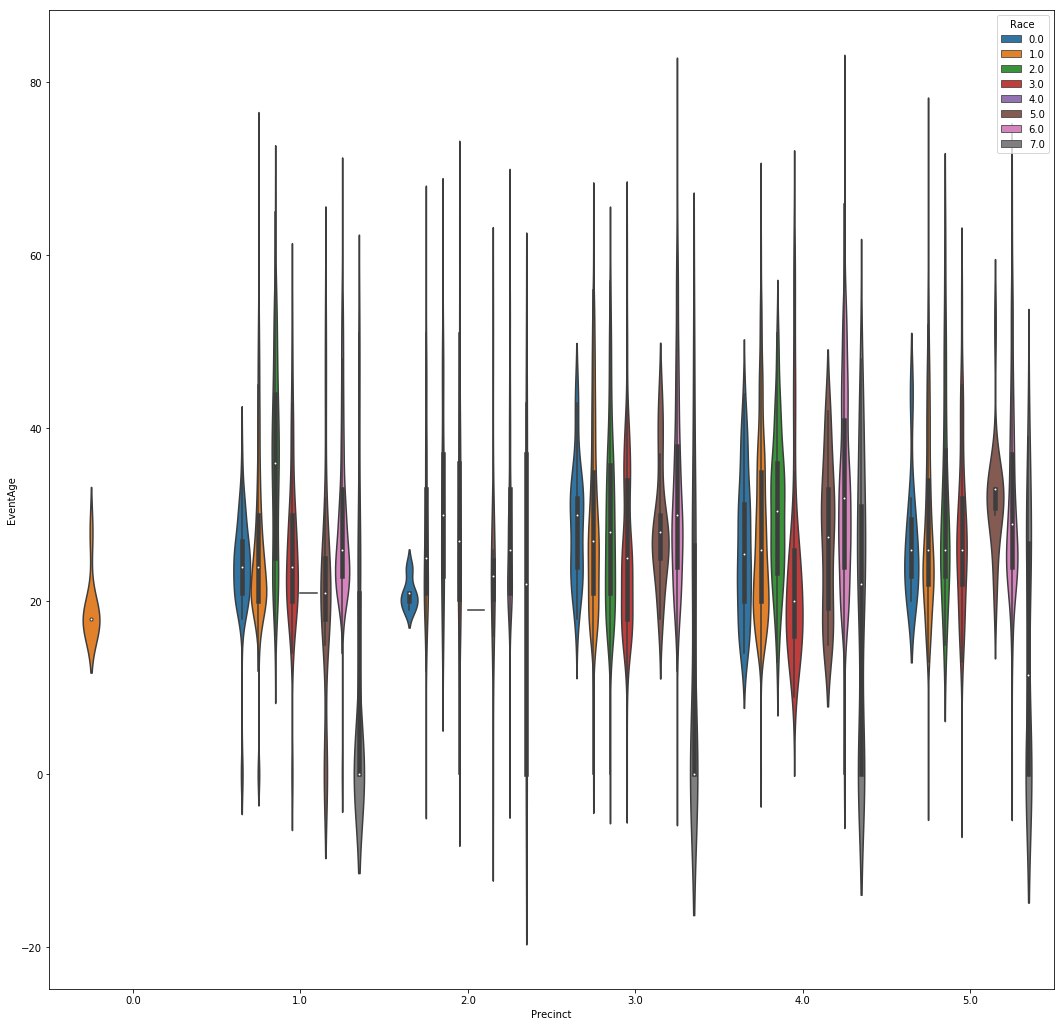

In [44]:
import seaborn as sns
#sns.set()
# with sns.axes_style(style='ticks'):
fig, ax = plt.subplots(figsize=(2^16, 2^16))
s = sns.catplot(ax=ax, x = 'Precinct', y = 'EventAge', data = data, hue = 'Race', kind="violin")
plt.close(s.fig)

Plotting Race distribution.

In [45]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='stasya00', api_key='Vre2UuKcEWvUr1B0YqAs')
trace = go.Pie(labels=inter['Race'].value_counts().index, values=inter['Race'].value_counts())
py.iplot([trace], filename='basic_pie_chart')



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~stasya00/0 or inside your plot.ly account where it is named 'basic_pie_chart'


The total population distribution by race.

In [46]:
a_df = pd.read_csv('../ACS_variable_descriptions.csv')
single_race_df = race_ds[["HC01_VC49", "HC01_VC50", "HC01_VC51", "HC01_VC56", "HC01_VC64", "HC01_VC69"]][1:]
traces = []
for i, col in enumerate(single_race_df.columns):
    nm = a_df[a_df["GEO.id"] == col]["Id"].iloc(0)[0].replace("Estimate; RACE - One race - ", "")
    if nm in ["White", "Black or African American"]:
        continue
    trace = go.Bar(x=race_ds["GEO.display-label"][1:], y=single_race_df[col], name=nm, marker=dict(opacity=0.6))
    traces.append(trace)
layout = dict(barmode="stack", title="Population Breakdown by Race (Single)", margin=dict(b=100), height=400, legend=dict(x=-0.1, y=1, orientation="h"))
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

FileNotFoundError: File b'../ACS_variable_descriptions.csv' does not exist

So the dominant race is Black. followed by the white race.

In [122]:
race_ds.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC04_VC108,HC01_VC109,HC02_VC109,HC03_VC109,HC04_VC109,HC01_VC110,HC02_VC110,HC03_VC110,HC04_VC110,GEO.display-label_cln
0,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total p...,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total populatio...,Percent; SEX AND AGE - Total population - Male,...,"Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...",Geography
1,1400000US27053000101,27053000101,"Census Tract 1.01, Hennepin County, Minnesota",3249,380,3249,(X),1599,250,49.2,...,(X),1058,126,50.8,4.9,1024,152,49.2,4.9,"CT: 1.01, Hennepin County, Minnesota"
2,1400000US27053000102,27053000102,"Census Tract 1.02, Hennepin County, Minnesota",5420,410,5420,(X),2536,229,46.8,...,(X),1611,177,46.9,3.6,1824,192,53.1,3.6,"CT: 1.02, Hennepin County, Minnesota"
3,1400000US27053000300,27053000300,"Census Tract 3, Hennepin County, Minnesota",3180,206,3180,(X),1603,193,50.4,...,(X),1187,111,46.8,3.2,1351,122,53.2,3.2,"CT: 3, Hennepin County, Minnesota"
4,1400000US27053000601,27053000601,"Census Tract 6.01, Hennepin County, Minnesota",4890,422,4890,(X),2471,296,50.5,...,(X),1902,242,50.8,4.4,1839,185,49.2,4.4,"CT: 6.01, Hennepin County, Minnesota"


Checking the age distribution in the list of the crimes committed.

In [121]:
age_cols = []
names = []
for i in range(13):
    if i < 2:
        i = "0"+str(i+8)
        relcol = "HC01_VC" + str(i)
    else:
        relcol = "HC01_VC" + str(i+8)
    age_cols.append(relcol)
    name = a_df[a_df["GEO.id"] == relcol]["Id"].iloc(0)[0].replace("Estimate; SEX AND AGE - ","")
    names.append(name)

race_ds['GEO.display-label_cln'] = race_ds["GEO.display-label"].apply(lambda x : x.replace(", Marion County, Indiana", "").replace("Census Tract ", "CT: "))

traces = []
for i,agecol in enumerate(age_cols):
    x = race_ds["GEO.display-label_cln"][1:]
    y = race_ds[agecol][1:]
    trace = go.Bar(y=y, x=x, name=names[i])
    traces.append(trace)

tmp = pd.DataFrame()
vals = []
Geo = []
Col = []
for i,age_col in enumerate(age_cols):
    Geo += list(race_ds["GEO.display-label_cln"][1:].values)
    Col += list([names[i]]*len(race_ds[1:]))
    vals += list(race_ds[age_col][1:].values)

tmp['Geo'] = Geo
tmp['Col'] = Col
tmp['Val'] = vals
tmp['Val'] = tmp['Val'].astype(int)  * 0.01

data = [go.Scatter(x = tmp["Geo"], y = tmp["Col"], mode="markers", marker=dict(size=list(tmp["Val"].values)))]
layout = dict(title="Age Distribution by Census Tract - Marion County, Indiana", legend=dict(x=-0.1, y=1, orientation="h"), 
              margin=dict(l=150, b=100), height=600, barmode="stack")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

So the most criminal age turns out to be 25-54, in one particular region 15-24.

Checking the correlations between the values.

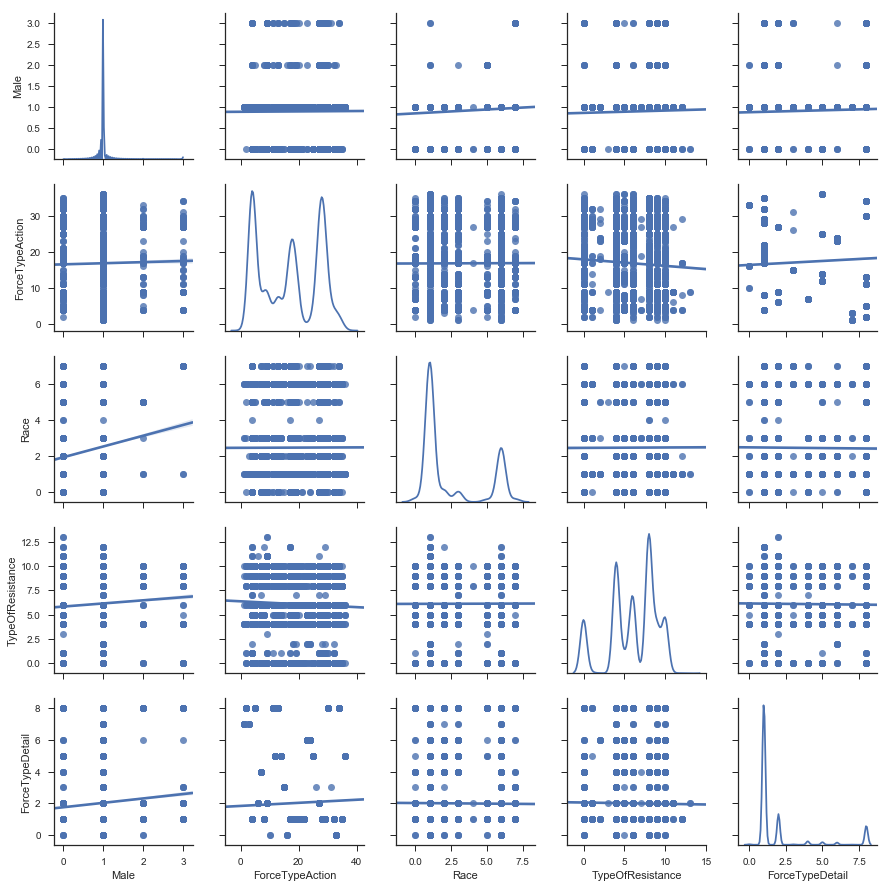

In [44]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.set(style="ticks", color_codes=True)
sns.pairplot(data[['Male', 'ForceTypeAction', 'Race', 'TypeOfResistance', 'ForceTypeDetail']], diag_kind="kde", kind = 'reg');

Questions:

1. Is the racism in police connected to the districts distribution or characteristics (particularly unemployement)?
2. Is the racism connected to the type of force used?
3. Do the crimes commited correspond to the age group?
4. Does the number of the officers in the richest regions (or with the majority of white population) correspond to the density of population?


In [45]:
new_df1.Geography = new_df1.Geography.apply(lambda x : x.replace(", Marion County, Indiana", "").replace("Census Tract ", "CT: "))

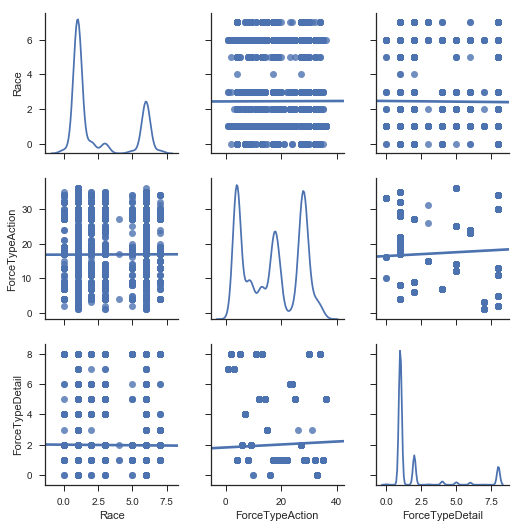

In [47]:
sns.pairplot(data[['Race', 'ForceTypeAction', 'ForceTypeDetail']], diag_kind="kde", kind = 'reg');

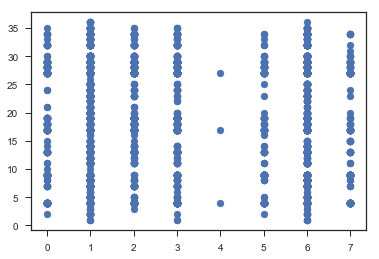

In [48]:
plt.scatter(x=data.Race, y=data.ForceTypeAction)

In [50]:
inter.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,...,10.0,11.0,12.0,13.0,0.0,1.0,2.0,3.0,4.0,5.0
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [117]:
mapa = folium.Map([44.99, -93.27], height=500, zoom_start=11, tiles='Stamen Terrain')
folium.GeoJson(map1).add_to(mapa)
mapa

In [78]:
data.X = data.X.astype(float)
data.Y = data.Y.astype(float)

In [80]:
data['coordinates'] = data.apply(lambda x: Point(x['X'],x['Y']), axis=1)
data = gpd.GeoDataFrame(data, geometry='coordinates')
data.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,TypeOfResistance,Precinct,coordinates
1,-93.271699,45.008036,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25.0,0.0,2.0,POINT (-93.27169927 45.00803595)
2,-93.271699,45.008036,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25.0,0.0,2.0,POINT (-93.27169927 45.00803595)
3,-93.271699,45.008036,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25.0,0.0,2.0,POINT (-93.27169927 45.00803595)
4,-93.247020,44.959744,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27.0,4.0,3.0,POINT (-93.24701976999999 44.95974418)
5,-93.247020,44.959744,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27.0,4.0,3.0,POINT (-93.24701976999999 44.95974418)


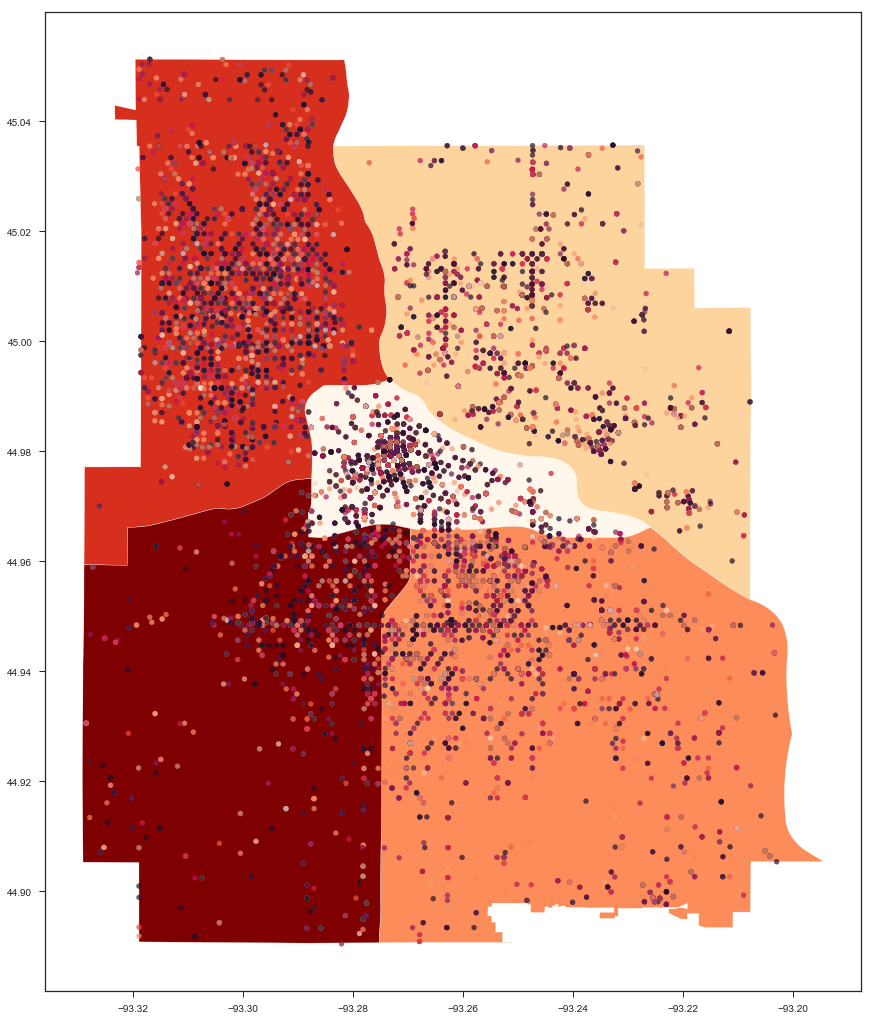

In [92]:
fig, ax = plt.subplots(figsize=(2^16,2^16))
ax.set_aspect('equal')
map1.plot(ax=ax, figsize=(2^16,2^16), cmap='OrRd', edgecolor='white')
data.plot(ax=ax,column='ForceTypeAction', markersize=25, alpha=0.7)
plt.show()

No handles with labels found to put in legend.


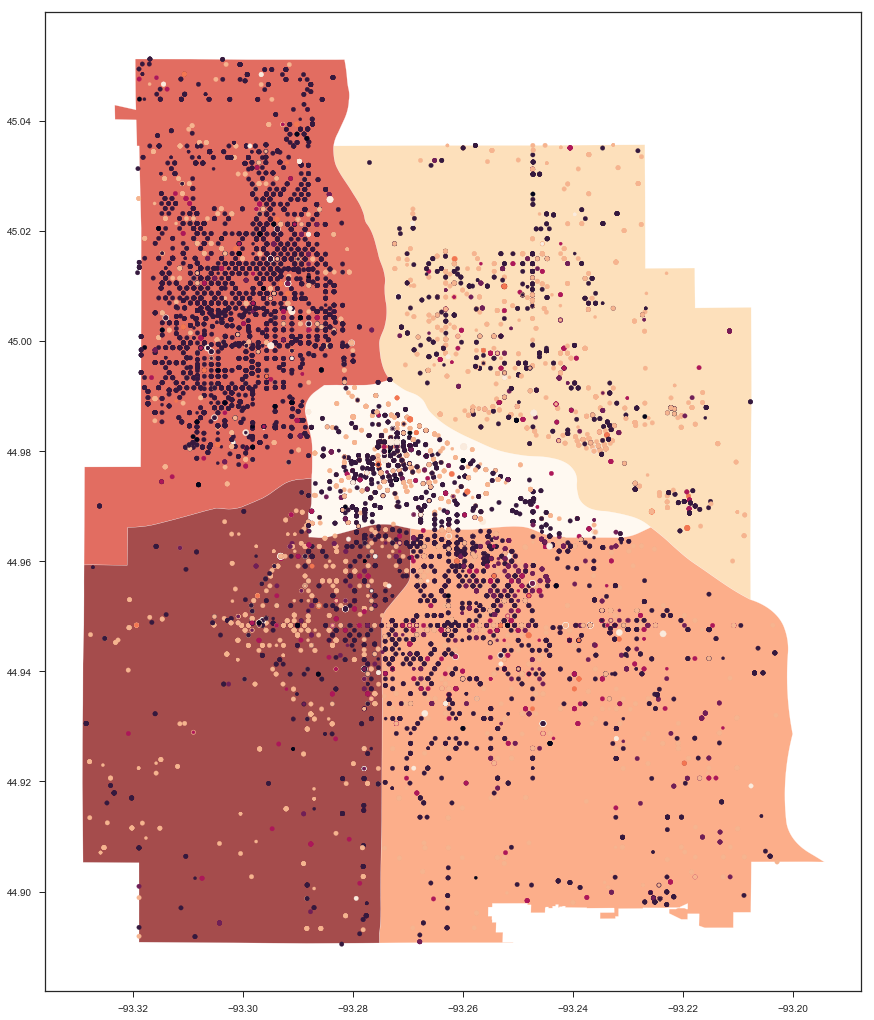

In [102]:
fig, ax = plt.subplots(figsize=(2^16,2^16), )
ax.set_aspect('equal')
map1.plot(ax=ax, cmap='OrRd', edgecolor='white', alpha=0.7)
data.plot(ax=ax,column='Race', markersize=data.Male*10+10)
plt.legend()
plt.show()

In [64]:
inter.Precinct.unique()

array([2., 3., 1., 5., 4., 0.])

In [66]:
data.head()

,X,Y,PoliceUseOfForceID,ResponseDate,nan,ForceTypeDetail,ForceTypeAction,Race,Male,EventAge,TypeOfResistance,Precinct
1,-93.27169927,45.00803595,1,2008-01-01,01:15:31.000Z,1.0,29.0,1.0,0.0,25.0,0.0,2.0
2,-93.27169927,45.00803595,2,2008-01-01,01:15:31.000Z,1.0,4.0,1.0,0.0,25.0,0.0,2.0
3,-93.27169927,45.00803595,3,2008-01-01,01:15:31.000Z,1.0,28.0,1.0,0.0,25.0,0.0,2.0
4,-93.24701977,44.95974418,4,2008-01-01,01:27:27.000Z,1.0,17.0,6.0,1.0,27.0,4.0,3.0
5,-93.24701977,44.95974418,5,2008-01-01,01:27:27.000Z,1.0,4.0,6.0,1.0,27.0,4.0,3.0


In [73]:
data.X[:1]

1    -93.27169927
Name: X, dtype: object